In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import CLA, plotting
import copy

In [2]:
data = yf.download(tickers= "SPY QQQ GLD IEF TMF", period='10y')

[*********************100%***********************]  5 of 5 completed


In [3]:
df = data.Close.fillna(method='ffill')

In [4]:
df

,GLD,IEF,QQQ,SPY,TMF
Date,,,,,
2012-04-30,161.880005,105.690002,66.760002,139.869995,16.115000
2012-05-01,161.320007,105.330002,66.870003,140.740005,15.872500
2012-05-02,160.589996,105.529999,67.059998,140.320007,16.215000
2012-05-03,158.970001,105.519997,66.349998,139.250000,16.180000
2012-05-04,159.470001,105.940002,64.699997,137.000000,16.565001
...,...,...,...,...,...
2022-04-25,177.050003,103.400002,329.579987,428.510010,15.010000
2022-04-26,177.320007,104.089996,317.140015,416.100006,15.470000
2022-04-27,175.979996,103.510002,316.760010,417.269989,14.890000


In [5]:
df.head()

,GLD,IEF,QQQ,SPY,TMF
Date,,,,,
2012-04-30,161.880005,105.690002,66.760002,139.869995,16.115000
2012-05-01,161.320007,105.330002,66.870003,140.740005,15.872500
2012-05-02,160.589996,105.529999,67.059998,140.320007,16.215000
2012-05-03,158.970001,105.519997,66.349998,139.250000,16.180000
2012-05-04,159.470001,105.940002,64.699997,137.000000,16.565001


In [6]:
df.tail()

,GLD,IEF,QQQ,SPY,TMF
Date,,,,,
2022-04-25,177.050003,103.400002,329.579987,428.510010,15.01
2022-04-26,177.320007,104.089996,317.140015,416.100006,15.47
2022-04-27,175.979996,103.510002,316.760010,417.269989,14.89
2022-04-28,176.929993,103.360001,328.010010,427.809998,14.95
2022-04-29,176.910004,102.809998,313.250000,412.000000,14.36


In [7]:
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

In [8]:
mu

GLD    0.008929
IEF   -0.002762
QQQ    0.167394
SPY    0.114226
TMF   -0.011478
dtype: float64

In [9]:
n = len(df)/252
n

9.992063492063492

In [10]:
df.iloc[-1]

GLD    176.910004
IEF    102.809998
QQQ    313.250000
SPY    412.000000
TMF     14.360000
Name: 2022-04-29 00:00:00, dtype: float64

In [11]:
df.iloc[0]

GLD    161.880005
IEF    105.690002
QQQ     66.760002
SPY    139.869995
TMF     16.115000
Name: 2012-04-30 00:00:00, dtype: float64

In [12]:
(df.iloc[-1]/df.iloc[0])

GLD    1.092847
IEF    0.972750
QQQ    4.692181
SPY    2.945592
TMF    0.891095
dtype: float64

In [13]:
(df.iloc[-1]/df.iloc[0])-1

GLD    0.092847
IEF   -0.027250
QQQ    3.692181
SPY    1.945592
TMF   -0.108905
dtype: float64

In [14]:
(df.iloc[-1]/df.iloc[0])**(1/n)-1

GLD    0.008925
IEF   -0.002761
QQQ    0.167322
SPY    0.114178
TMF   -0.011473
dtype: float64

In [15]:
mu

GLD    0.008929
IEF   -0.002762
QQQ    0.167394
SPY    0.114226
TMF   -0.011478
dtype: float64

In [16]:
df.cov()

,GLD,IEF,QQQ,SPY,TMF
GLD,524.036031,91.353109,1336.632968,1084.944367,89.476135
IEF,91.353109,32.788831,330.647356,274.601096,38.888007
QQQ,1336.632968,330.647356,8382.396135,7851.084876,377.120888
SPY,1084.944367,274.601096,7851.084876,7525.243691,323.784205
TMF,89.476135,38.888007,377.120888,323.784205,53.123385


In [17]:
df.pct_change().cov()*252

,GLD,IEF,QQQ,SPY,TMF
GLD,0.022496,0.002743,0.000239,-0.000025,0.015888
IEF,0.002743,0.003270,-0.003163,-0.003297,0.021396
QQQ,0.000239,-0.003163,0.039419,0.030299,-0.022642
SPY,-0.000025,-0.003297,0.030299,0.027471,-0.024354
TMF,0.015888,0.021396,-0.022642,-0.024354,0.166791


In [18]:
S

,GLD,IEF,QQQ,SPY,TMF
GLD,0.022496,0.002743,0.000239,-0.000025,0.015888
IEF,0.002743,0.003270,-0.003163,-0.003297,0.021396
QQQ,0.000239,-0.003163,0.039419,0.030299,-0.022642
SPY,-0.000025,-0.003297,0.030299,0.027471,-0.024354
TMF,0.015888,0.021396,-0.022642,-0.024354,0.166791


In [19]:
ef = EfficientFrontier(mu, S)
ef

In [20]:
raw_weights = ef.max_sharpe()

In [21]:
raw_weights 

OrderedDict([('GLD', 0.0),
             ('IEF', 0.0),
             ('QQQ', 0.9192663112529864),
             ('SPY', 0.0),
             ('TMF', 0.0807336887470135)])

In [22]:
cleaned_weights = ef.clean_weights()
cleaned_weights

OrderedDict([('GLD', 0.0),
             ('IEF', 0.0),
             ('QQQ', 0.91927),
             ('SPY', 0.0),
             ('TMF', 0.08073)])

In [23]:
ef.portfolio_performance(verbose=True)

Expected annual return: 15.3%
Annual volatility: 17.6%
Sharpe Ratio: 0.75


(0.15295311617238355, 0.17617353194141736, 0.7546713442550167)

Expected annual return: 14.8%
Annual volatility: 17.0%
Sharpe Ratio: 0.75


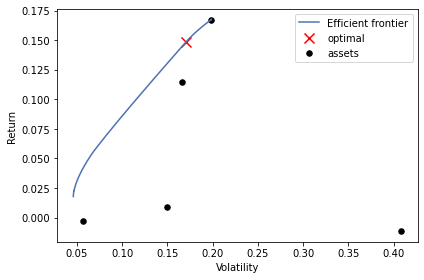

In [24]:
cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True)
ax = plotting.plot_efficient_frontier(cla, showfig=False)

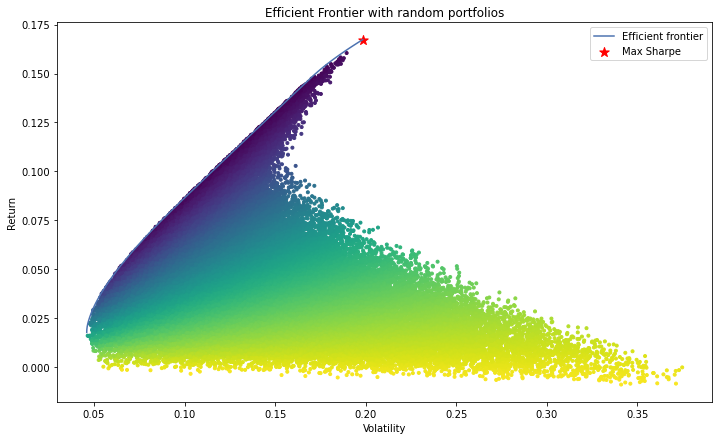

In [25]:
n_samples = 100000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt((w.T * (S @ w.T)).sum(axis=0))
sharpes = rets / stds

# Plot efficient frontier with Monte Carlo sim
ef = EfficientFrontier(mu, S)
ef_max_sharpe = copy.deepcopy(ef)

fig, ax = plt.subplots(figsize=(10, 6))
plotting.plot_efficient_frontier(ef_max_sharpe, ax=ax, show_assets=False)

# Find and plot the tangency portfolio
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Plot random portfolio
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Format
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.show()

In [26]:
np.random.dirichlet(np.ones(len(mu)), n_samples)

array([[0.0967673 , 0.37116911, 0.41817433, 0.04782742, 0.06606184],
       [0.32269434, 0.27054741, 0.22967486, 0.14163392, 0.03544948],
       [0.03908107, 0.15280594, 0.14783866, 0.29481728, 0.36545704],
       ...,
       [0.00430363, 0.3047103 , 0.57163589, 0.00914734, 0.11020285],
       [0.10700257, 0.02509927, 0.137442  , 0.10593849, 0.62451768],
       [0.35467032, 0.25120149, 0.01629327, 0.06655853, 0.31127639]])

In [27]:
test2 = np.random.random(5)
test2

array([0.19860633, 0.48258437, 0.75349632, 0.5455856 , 0.14478835])

In [28]:
np.random.dirichlet(test2, n_samples)

array([[8.59982859e-02, 2.70322748e-02, 3.31168935e-01, 2.62164843e-01,
        2.93635661e-01],
       [2.33742831e-01, 2.20059313e-01, 3.54087670e-01, 1.92110184e-01,
        1.74863952e-09],
       [6.35149393e-03, 3.02816050e-01, 2.01083731e-03, 6.88821619e-01,
        5.98698296e-16],
       ...,
       [2.97105442e-06, 5.14949971e-03, 4.55872965e-01, 3.58078287e-01,
        1.80896277e-01],
       [2.30393301e-01, 3.25729513e-02, 6.84481044e-01, 5.25297438e-02,
        2.29604350e-05],
       [3.48354276e-05, 2.94556337e-02, 9.01036706e-01, 6.89312802e-02,
        5.41544814e-04]])

In [29]:
rets = w.dot(mu)
rets

array([0.07049344, 0.0582999 , 0.02597193, ..., 0.06327969, 0.03565662,
       0.06533207])

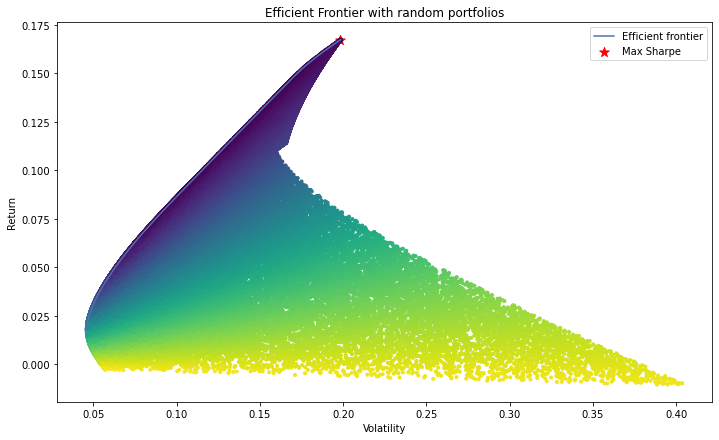

In [31]:
n_samples = 200000
w = np.random.dirichlet(test2, n_samples)
rets = w.dot(mu)
stds = np.sqrt((w.T * (S @ w.T)).sum(axis=0))
sharpes = rets / stds

# Plot efficient frontier with Monte Carlo sim
ef = EfficientFrontier(mu, S)
ef_max_sharpe = copy.deepcopy(ef)

fig, ax = plt.subplots(figsize=(10, 6))
plotting.plot_efficient_frontier(ef_max_sharpe, ax=ax, show_assets=False)

# Find and plot the tangency portfolio
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Plot random portfolio
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Format
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.show()

In [32]:
test3 = np.random.rand(5)
test3

array([0.10128573, 0.27902913, 0.5292762 , 0.58620121, 0.43586782])

In [33]:
np.random.dirichlet(test3, 1000)

array([[2.38994761e-12, 2.33217318e-02, 5.35451033e-01, 2.80752874e-01,
        1.60474362e-01],
       [8.03676602e-03, 2.14096443e-12, 1.15585723e-01, 1.08112813e-03,
        8.75296383e-01],
       [1.95163738e-03, 6.59977740e-02, 7.37103271e-02, 4.81077628e-01,
        3.77262633e-01],
       ...,
       [3.30994917e-03, 1.24694948e-02, 2.88852823e-03, 7.02359917e-01,
        2.78972111e-01],
       [3.74124446e-05, 3.16663313e-02, 4.58173966e-01, 4.37663719e-02,
        4.66355918e-01],
       [1.72168858e-02, 9.15053873e-03, 6.52135704e-03, 1.72762725e-01,
        7.94348493e-01]])

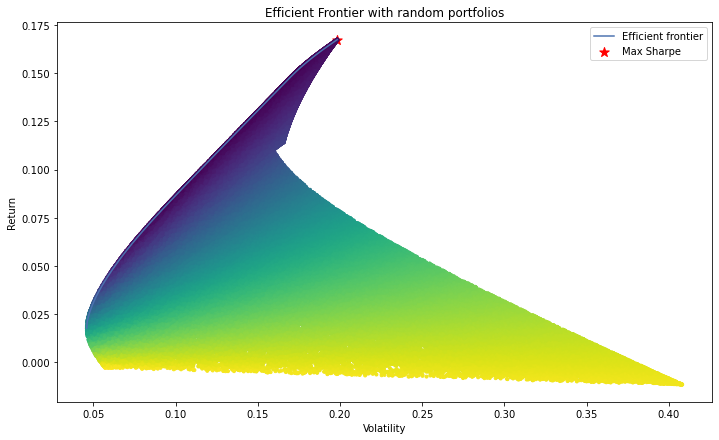

In [35]:
n_samples = 200000
w = np.random.dirichlet(test3, n_samples)
rets = w.dot(mu)
stds = np.sqrt((w.T * (S @ w.T)).sum(axis=0))
sharpes = rets / stds

# Plot efficient frontier with Monte Carlo sim
ef = EfficientFrontier(mu, S)
ef_max_sharpe = copy.deepcopy(ef)

fig, ax = plt.subplots(figsize=(10, 6))
plotting.plot_efficient_frontier(ef_max_sharpe, ax=ax, show_assets=False)

# Find and plot the tangency portfolio
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Plot random portfolio
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Format
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.show()

In [36]:
ef = EfficientFrontier(mu, S, weight_bounds=(-1, 1))

In [37]:
raw_weights_shortable = ef.max_sharpe()

In [38]:
raw_weights_shortable

OrderedDict([('GLD', 0.0078810979814177),
             ('IEF', -0.5039799549018981),
             ('QQQ', 1.0),
             ('SPY', 0.2778560922113051),
             ('TMF', 0.2182427647091754)])

In [39]:
ef = EfficientFrontier(mu, S, weight_bounds=(0, 0.3))
raw_weights_cap30 = ef.max_sharpe()

In [40]:
raw_weights_cap30

OrderedDict([('GLD', 0.0628194311539847),
             ('IEF', 0.3),
             ('QQQ', 0.3),
             ('SPY', 0.3),
             ('TMF', 0.0371805688460154)])

In [41]:
ef = EfficientFrontier(mu, S, weight_bounds=(0, 0.2))
raw_weights_cap20 = ef.max_sharpe()
raw_weights_cap20

OrderedDict([('GLD', 0.2),
             ('IEF', 0.2),
             ('QQQ', 0.2),
             ('SPY', 0.2),
             ('TMF', 0.1999999999999999)])